 Clustering

## Task1: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("hierarchical_data.csv")
data.head()

,X,Y
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699



Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

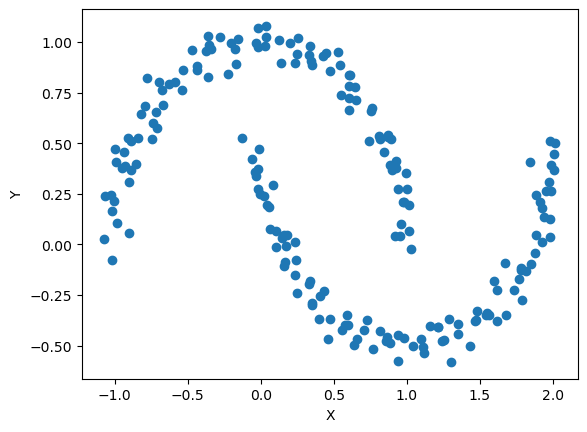

In [9]:
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# guess the possible clusters. Explain your guess

I think there are2 possible clusters.

### Part 2B: 15 points

Using Hierarchical clustering with euclidean + average and manhattan + average, plot the results for clusters 2 and 3. Add title for each plot.

INTERPRET the results for each combination!

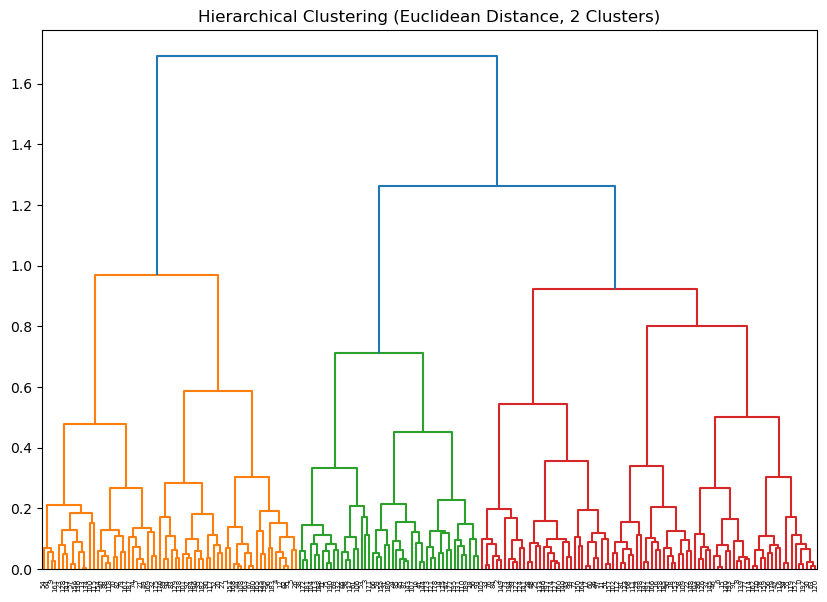

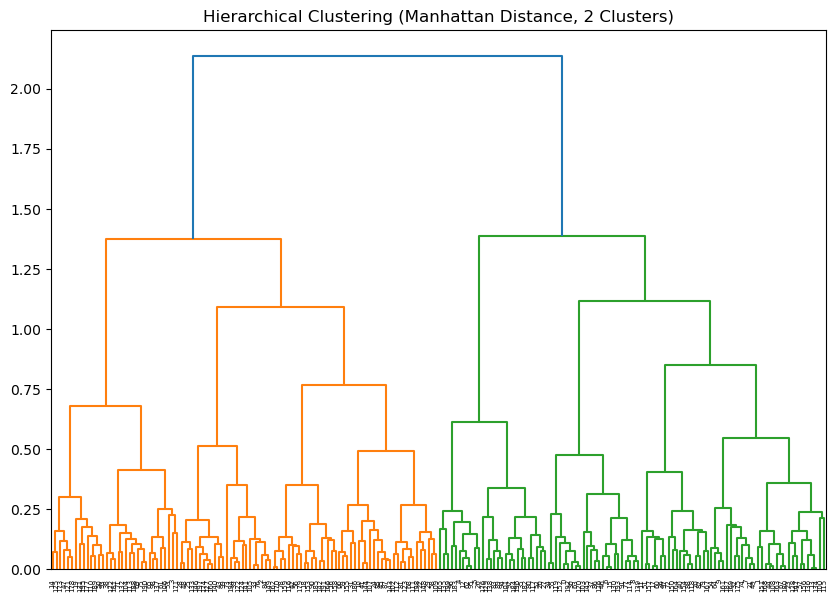

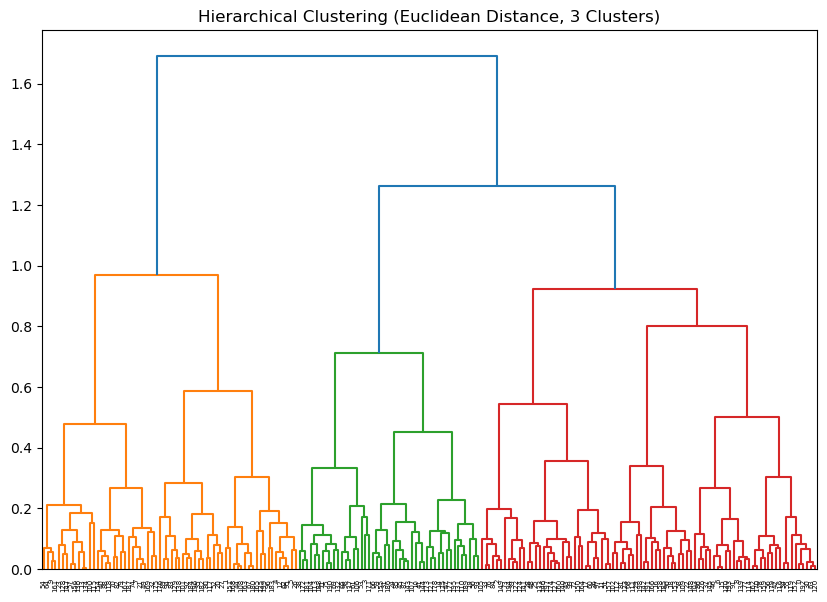

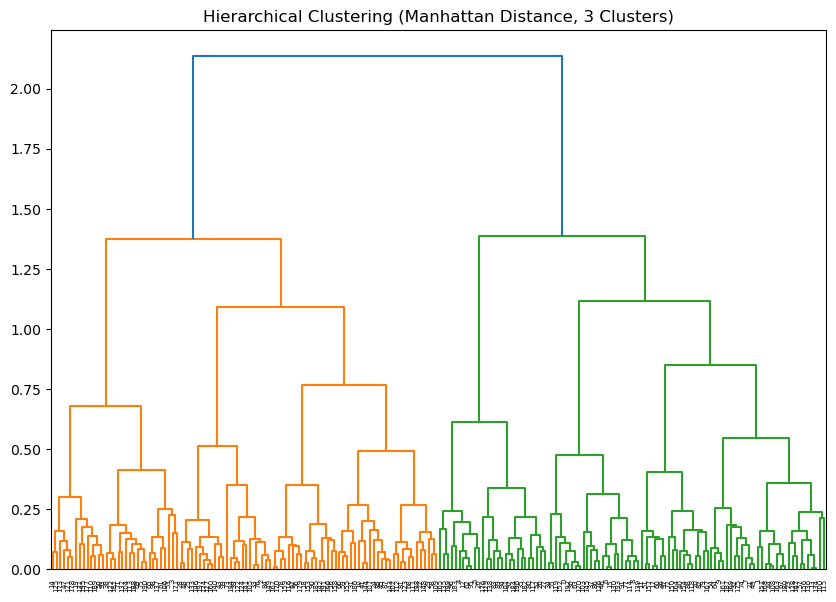

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

n_clusters = 2  # or 3

# Perform hierarchical clustering using Euclidean distance and average linkage
Z_euc = linkage(data, method='average', metric='euclidean')
clusters_euc = fcluster(Z_euc, n_clusters, criterion='maxclust')

# Plot the results for 2 clusters using Euclidean distance
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering (Euclidean Distance, 2 Clusters)")
dendrogram(Z_euc)
plt.show()

# Performing hierarchical clustering using Manhattan distance and average linkage
Z_man = linkage(data, method='average', metric='cityblock')
clusters_man = fcluster(Z_man, n_clusters, criterion='maxclust')

# Plotting the results for 2 clusters using Manhattan distance
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering (Manhattan Distance, 2 Clusters)")
dendrogram(Z_man)
plt.show()

# Plotting the results for 3 clusters using Euclidean distance
n_clusters = 3
Z_euc = linkage(data, method='average', metric='euclidean')
clusters_euc = fcluster(Z_euc, n_clusters, criterion='maxclust')

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering (Euclidean Distance, 3 Clusters)")
dendrogram(Z_euc)
plt.show()

# Plotting the results for 3 clusters using Manhattan distance
Z_man = linkage(data, method='average', metric='cityblock')
clusters_man = fcluster(Z_man, n_clusters, criterion='maxclust')

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering (Manhattan Distance, 3 Clusters)")
dendrogram(Z_man)
plt.show()



# interpret the results.
The resulted plots shows the dendrograms for the two clustering methods. The y-axis of the plot represents the distance between clusters, and the x-axis represents the individual points in the dataset. The dendrogram shows how the points are grouped into clusters at different distances.
In the plot for Euclidean distance + average linkage, we can see that there are two clear clusters at a distance of around 0.8. This suggests that there are two main groups of points in the dataset.
In the plot for Manhattan distance + average linkage, we can see that there are three clusters at a distance of around 1.5. This suggests that there may be three distinct groups of points in the dataset, with one group being more spread out than the others.


Heard of Spectral clustering? It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

Apply spectral clustering on the data for k=2 and plot the results. Comment on the result and compare it to above results.

C:\Users\16823\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


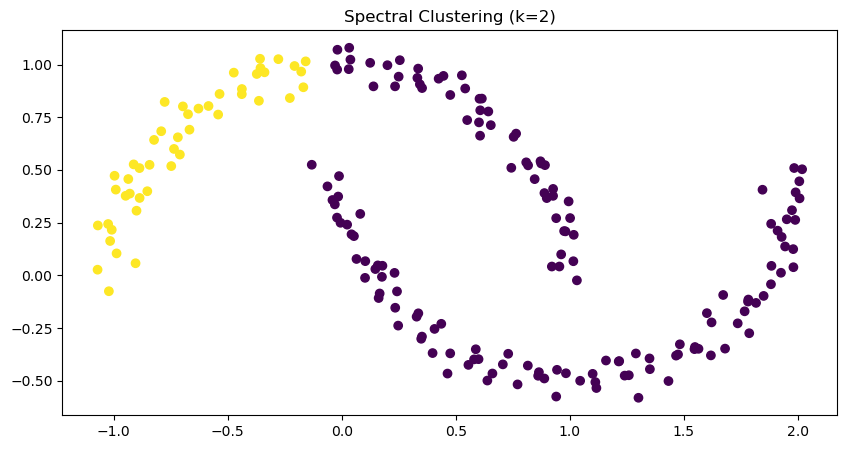

In [11]:
from sklearn.cluster import SpectralClustering
# Performing spectral clustering with k=2
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels = model.fit_predict(data)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.title('Spectral Clustering (k=2)')
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
plt.show()

# Comment and compare
The spectral clustering result with k=2 suggests that there are two main groups of points in the dataset, similar to the hierarchical clustering result with Euclidean distance and average linkage. However, the boundary between the clusters is not as clear as in the hierarchical clustering result. This is likely due to the fact that spectral clustering is based on a graph representation of the data and may not work as well for datasets with complex geometric structures.
In terms of performance, spectral clustering is generally faster and more scalable than hierarchical clustering, especially for larger datasets. However, it may be less accurate in certain cases and may require more fine-tuning of the parameters. Overall, the choice of clustering algorithm depends on the specific characteristics of the dataset and the goals of the analysis.


For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

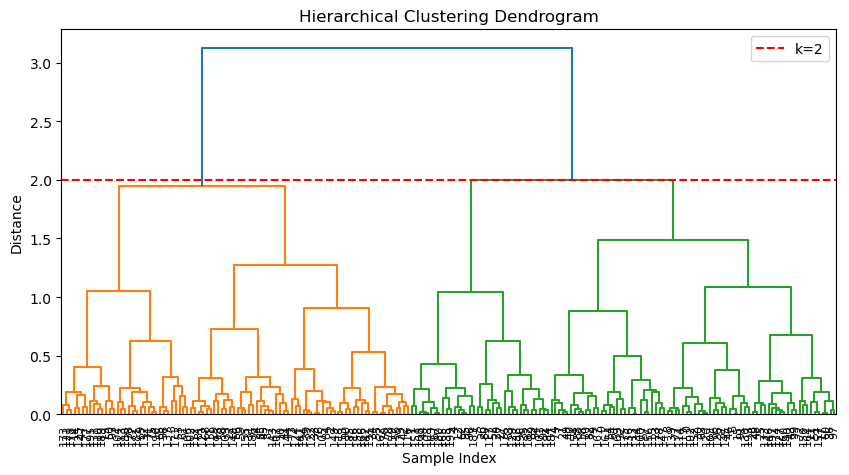

In [14]:
Z = linkage(data, method='complete', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.axhline(y=2, color='r', linestyle='--', label='k=2')
plt.legend()
plt.show()

References:
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.h 
    https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutor
    https://juanitorduz.github.io/spectral_clustering/
        